# Transform data

- Erase the unessary data to do the basic analysis (rows that are to compute risk or not necessary in this part)

In [ ]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer

In [5]:
data = pd.read_csv("../data/2-Processed/Forms-Results-Translated.csv")

In [6]:
data = data.drop(columns=['I feel more confident in solving problems on my own without AI assistance.',
                          'Using AI makes me feel mentally lazy.',
                          'Relying on AI helps reduce my stress.',
                          'AI tools make me second-guess my own knowledge or decisions.',
                          'Its recomendable for people to use AI as conversational partner',
                          'What application with AI would you like to exist?'])

In [15]:
data.head()

,ID,Age,Occupation,Gender,Education Level,Country,How often do you use AI tools?,What do you primarily use AI tools for?,Do you feel more productive when using AI tools?,Do you believe overuse of AI can negatively affect mental health or problem-solving skills?,Do you know someone that use AI as conversational partner?
0,0,25-34,Analyst,Female,Master’s Degree,Germany,Daily,['Studying or learning'],Yes,Yes,Yes
1,1,25-34,Lead Project Coordinator at A University,Male,Master’s Degree,Spain,Daily,['Work/professional tasks'],Yes,Yes,No
2,2,25-34,Unemployed,Female,Bachelor’s Degree,Spain,Several times a week,['Studying or learning'],Yes,Yes,Yes
3,3,18-24,Game Writer,Female,Bachelor’s Degree,Australia,Rarely,['Inspiration for work'],Yes,Yes,No
4,4,18-24,Freelance artist,Trans,Bachelor’s Degree,Canada,Never,"[""Don't use""]",No,Yes,No


- Separate the row of "What do you primarily use AI tools for?" from a list into different columns so can be read in tableau.

<Axes: title={'center': 'AI Tool Usage Purposes'}>

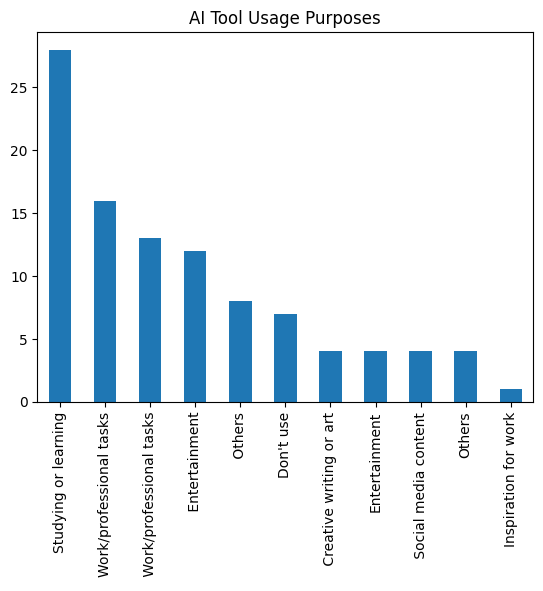

In [ ]:
# Step 1: Convert the string representation of lists to actual lists
data = data.rename(columns={'What do you primarily use AI tools for?': 'AI_Use_List'})

# Step 2: One-hot encode the list directly (since it's already a list!)
mlb = MultiLabelBinarizer()
encoded_df = pd.DataFrame(mlb.fit_transform(data['AI_Use_List']),
                          columns=mlb.classes_,
                          index=data.index)

# Step 3: Combine with original data 
data_with_flags = pd.concat([data, encoded_df], axis=1)

# Step 4: Plot usage frequencies
usage_summary = data_with_flags[mlb.classes_].sum().sort_values(ascending=False)
usage_summary.plot(kind='bar', title='AI Tool Usage Purposes')

In [17]:
data_with_flags.keys()

Index(['ID', 'Age', 'Occupation', 'Gender', 'Education Level', 'Country',
       'How often do you use AI tools?', 'AI_Use_List',
       'Do you feel more productive when using AI tools?',
       'Do you believe overuse of AI can negatively affect mental health or problem-solving skills?',
       'Do you know someone that use AI as  conversational partner?',
       ' Creative writing or art', ' Entertainment', ' Others',
       ' Social media content', ' Work/professional tasks', 'Don't use',
       'Entertainment', 'Inspiration for work', 'Others',
       'Studying or learning', 'Work/professional tasks'],
      dtype='object')

# Export to another file

- Export to a basic file that will be used to create the dashboard basic documentation

In [18]:
data_with_flags.to_csv('../data/2-Processed/Forms-Results-Basic_Data.csv', index=False)  